In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mail_data.csv to mail_data.csv


In [3]:
df = pd.read_csv('mail_data.csv')
df.shape

(5572, 2)

In [4]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)


unique_values = df['spam'].unique()
print("Unique values in 'spam' column:", unique_values)

Unique values in 'spam' column: [0 1]


In [5]:
display(df)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


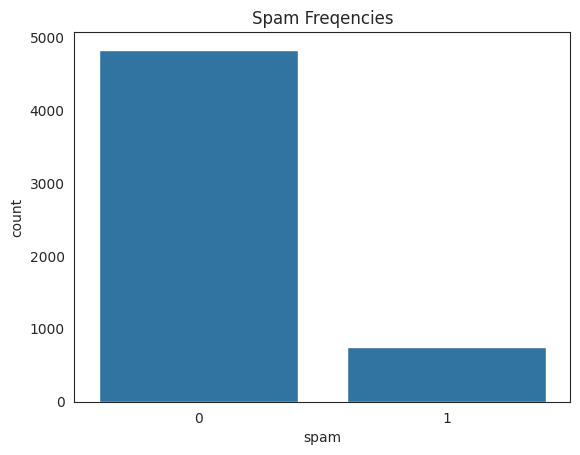

In [6]:
plt.figure(dpi=100)
sns.countplot(x=df['spam'])
plt.title("Spam Freqencies")
plt.show()


In [7]:
df.isnull().sum()

,0
Category,0
Message,0
spam,0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [10]:
vectorizer = CountVectorizer(analyzer=process)
message = vectorizer.fit_transform(df['Message'])

In [11]:
import pickle

# Save the vectorizer object
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [12]:
from google.colab import files

files.download("vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(message, df['spam'], test_size=0.20, random_state=0)

In [14]:
model = MultinomialNB()

In [15]:
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
import pickle
# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [17]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

96.12403100775194

In [20]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.97      0.98       897\n           1       0.81      0.93      0.86       135\n\n    accuracy                           0.96      1032\n   macro avg       0.90      0.95      0.92      1032\nweighted avg       0.96      0.96      0.96      1032\n'

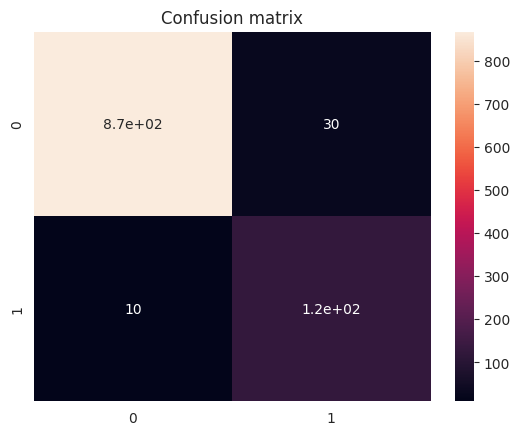

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [26]:
import pickle

# Load the trained model and vectorizer
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# Input email message from the user
user_input = input("Enter the email message:\n")

# Transform the input using the same vectorizer
input_vector = vectorizer.transform([user_input])

# Predict using the trained model
prediction = model.predict(input_vector)

# Print result
if prediction[0] == 1:
    print("⚠️ The email is classified as: SPAM")
else:
    print("✅ The email is classified as: NOT SPAM")


Enter the email message:
you have just won a paris tour for 1 week ..do you want to enroll?
✅ The email is classified as: NOT SPAM
